In [1]:
%matplotlib notebook

In [2]:
import json
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
import numpy as np
from adjustText import adjust_text


plt.rcParams['figure.figsize'] = 9, 5
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.frameon']=True
plt.rcParams['legend.facecolor']='white'
plt.rcParams['legend.framealpha']=0.5
plt.rcParams['font.size'] = 14

In [3]:
with open('data.json', encoding='utf-8') as json_file:
    data = json.load(json_file)

In [4]:
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4, sort_keys=True)

https://github.com/Phlya/adjustText

In [5]:
def get_parameter(*params_name: str) -> np.array:
        
    params_dict = {}
    for name in params_name:
        params_dict[name] = np.array([])

    for key1, val1 in data.items():
            
        params_dict_temp = params_dict.copy()
        for key2, val2 in params_dict_temp.items():
            
            for key3, val3 in val1.items():
                if key2==key3:
                    if isinstance(val3, list):
                        if isinstance(val3[1], str):
                            val2 = np.append(val2, ufloat(val3[0], np.nan))
                        else:
                            val2 = np.append(val2, ufloat(val3[0], val3[1]))
                    else:
                        val2 = np.append(val2, val3)
                    
            params_dict[key2] = val2
        
        nb_values = max([len(i) for i in params_dict.values()])
        
        params_dict_temp = params_dict.copy()
        for key2, val2 in params_dict_temp.items():
            if len(val2)<nb_values:
                val2 = np.append(val2, np.nan)
                
            params_dict[key2] = val2
                
                    
    return params_dict

In [6]:
d = get_parameter('year', 't1', 'type')
labels = d['type'].astype(str)
xs = d['year'].astype(int)
ys = unumpy.nominal_values(d['t1'])
colors = plt.cm.hsv(np.linspace(0,1,len(labels)))

<IPython.core.display.Javascript object>


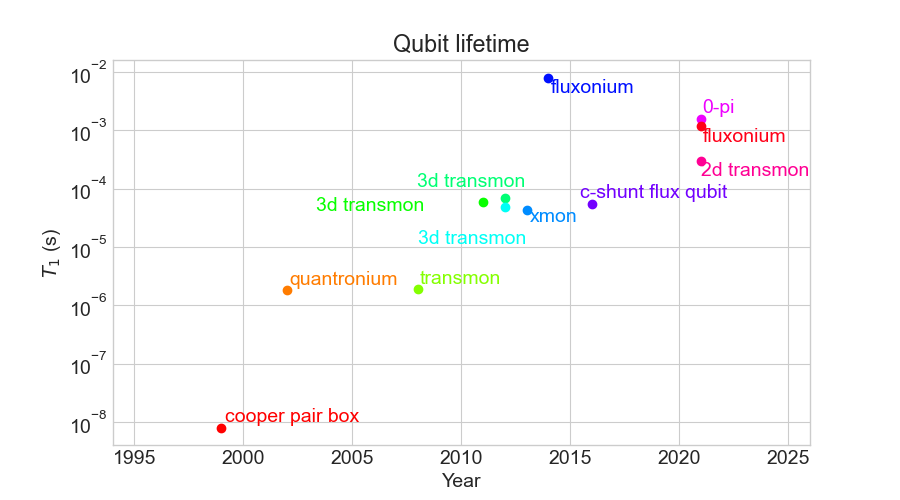

C:\Users\ed261978\Anaconda3\envs\python37\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


86

In [7]:
fig, ax = plt.subplots(1, 1)

texts = []
for label, x, y, color in zip(labels, xs, ys, colors):
    ax.plot(x, y, 'o', color=color)
    texts.append(plt.text(x, y, label, color=color))
    

ax.set_title('Qubit lifetime')
ax.set_yscale('log')
ax.set_xlim(xs[0]-5, xs[-1]+5)
ax.set_xlabel('Year')
ax.set_ylabel(r'$T_1$ (s)')

adjust_text(texts)

In [8]:
d = get_parameter('year', 't2_ramsey', 'type')
labels = d['type'].astype(str)
xs = d['year'].astype(int)
ys = unumpy.nominal_values(d['t2_ramsey'])
colors = plt.cm.hsv(np.linspace(0,1,len(labels)))

<IPython.core.display.Javascript object>


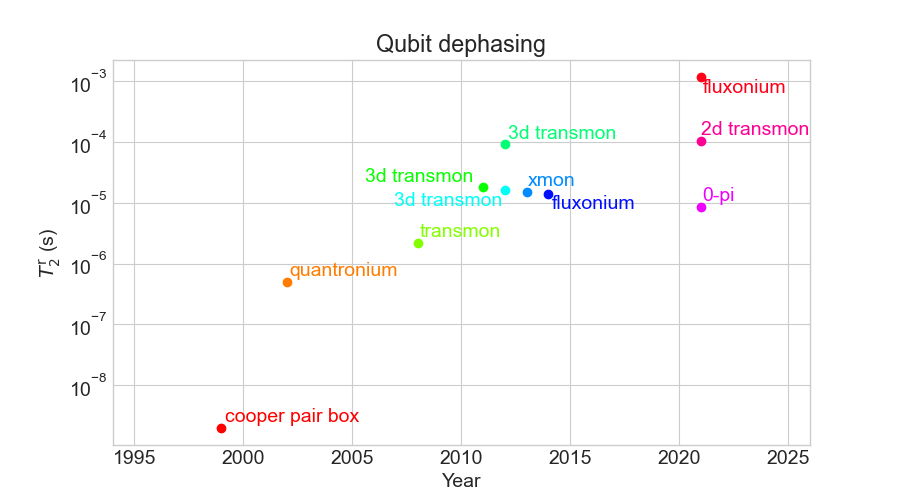

64

In [9]:
fig, ax = plt.subplots(1, 1)

texts = []
for label, x, y, color in zip(labels, xs, ys, colors):
    ax.plot(x, y, 'o', color=color)
    texts.append(plt.text(x, y, label, color=color))
    

ax.set_title('Qubit dephasing')
ax.set_yscale('log')
ax.set_xlim(xs[0]-5, xs[-1]+5)
ax.set_xlabel('Year')
ax.set_ylabel(r'$T_2^\mathrm{r}$ (s)')

adjust_text(texts)

In [10]:
d = get_parameter('year', 't1', 't2_ramsey', 'type')
labels = d['type'].astype(str)
xs = d['year'].astype(int)
y1s = unumpy.nominal_values(d['t1'])
y2s = unumpy.nominal_values(d['t2_ramsey'])
colors = plt.cm.hsv(np.linspace(0,1,len(labels)))

<IPython.core.display.Javascript object>


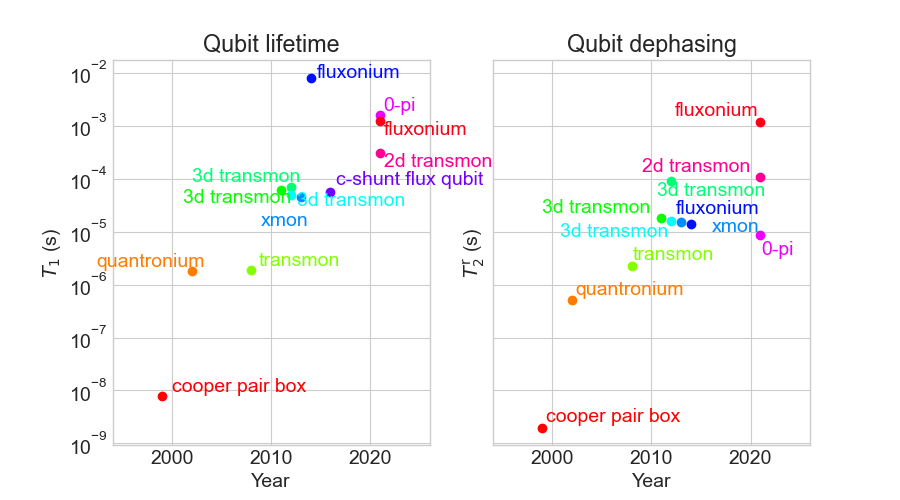

33

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True)

texts = []
for label, x, y, color in zip(labels, xs, y1s, colors):
    ax[0].plot(x, y, 'o', color=color)
    texts.append(ax[0].text(x, y, label, color=color))
    

ax[0].set_title('Qubit lifetime')
ax[0].set_yscale('log')
ax[0].set_xlim(xs[0]-5, xs[-1]+5)
ax[0].set_xlabel('Year')
ax[0].set_ylabel(r'$T_1$ (s)')

adjust_text(texts)

texts = []
for label, x, y, color in zip(labels, xs, y2s, colors):
    ax[1].plot(x, y, 'o', color=color)
    texts.append(ax[1].text(x, y, label, color=color))
    

ax[1].set_title('Qubit dephasing')
ax[1].set_yscale('log')
ax[1].set_xlim(xs[0]-5, xs[-1]+5)
ax[1].set_xlabel('Year')
ax[1].set_ylabel(r'$T_2^\mathrm{r}$ (s)')

adjust_text(texts)

In [12]:
d = get_parameter('ej', 'ec', 'el', 't1', 'type')
labels = d['type'].astype(str)
ejs = unumpy.nominal_values(d['ej'])
ecs = unumpy.nominal_values(d['ec'])
t1s = unumpy.nominal_values(d['t1'])
els = np.nan_to_num(unumpy.nominal_values(d['el']))
colors = plt.cm.hsv(np.linspace(0,1,len(ejs)))

In [13]:
els, ejs/ecs

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4487e+08, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.4000e+08]),
 array([  0.44275618,   1.26990839,   1.53846154,  50.        ,
         70.09966777,  48.82038835,          nan,  95.        ,
          4.61538462, 103.42857143,          nan,          nan,
          5.15740741]))

<IPython.core.display.Javascript object>


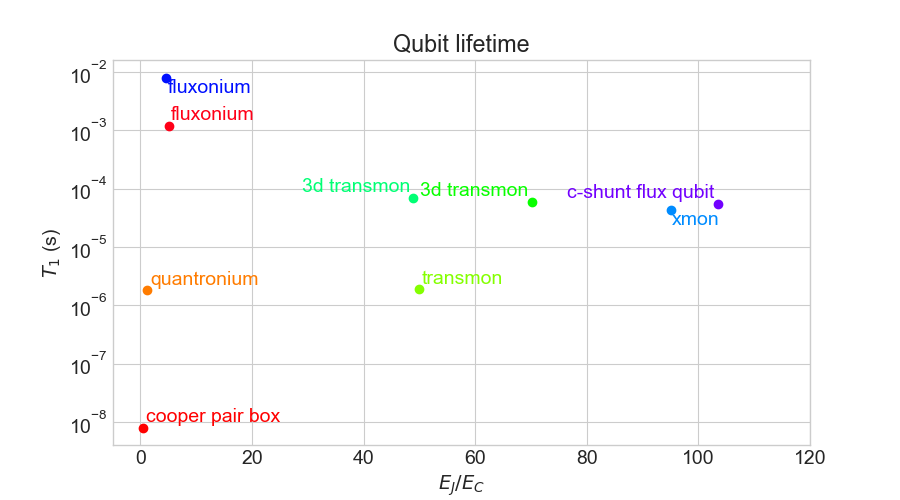

64

In [14]:
fig, ax = plt.subplots(1, 1)

texts = []
for label, x, y, color in zip(labels, ejs/ecs, t1s, colors):
    ax.plot(x, y, 'o', color=color)
    texts.append(plt.text(x, y, label, color=color))
    

ax.set_title('Qubit lifetime')
ax.set_yscale('log')
ax.set_xlim(-5, 120)
ax.set_xlabel('$E_J/E_C$')
ax.set_ylabel(r'$T_1$ (s)')

adjust_text(texts)